<a href="https://colab.research.google.com/github/Nehakadam30/NNDL_LAB-2022/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [10]:
df = pd.read_csv('/content/Churn_Modelling.csv')


In [11]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [13]:
df.sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1878,648,Spain,Male,35,7,0.00,2,1,1,78436.36,0
1500,630,France,Male,50,1,81947.76,1,0,1,63606.22,1
5133,479,Spain,Male,37,6,118433.94,1,0,1,160060.90,0
3245,514,Germany,Female,45,3,109032.23,1,0,1,155407.21,1
519,707,France,Male,58,6,89685.92,1,0,1,126471.13,0


In [14]:
df['Geography'].nunique()

3

In [15]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,0,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,0,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [18]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [19]:
df1.sample(10)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8464,850,1,34,4,71379.53,2,1,1,154000.99,0,1,0,0
4295,476,1,34,8,111905.43,1,0,1,197221.81,1,0,1,0
5608,518,1,27,1,133801.49,1,1,1,143315.57,0,1,0,0
8720,711,1,28,8,0.00,2,0,0,105159.89,0,1,0,0
2054,747,0,41,5,0.00,2,1,1,22750.17,0,1,0,0
6752,624,0,38,7,123906.55,1,1,0,135096.78,0,0,0,1
6421,616,0,23,8,73112.95,1,1,1,62733.05,0,1,0,0
144,691,1,31,5,40915.55,1,1,0,126213.84,1,1,0,0
1789,763,1,37,6,0.00,2,1,1,149705.25,0,0,0,1
645,673,1,34,8,42157.08,1,1,0,20598.59,1,1,0,0


In [20]:
df1.dtypes


CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


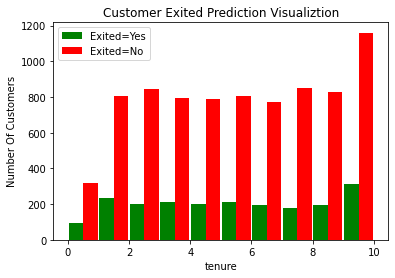

In [21]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


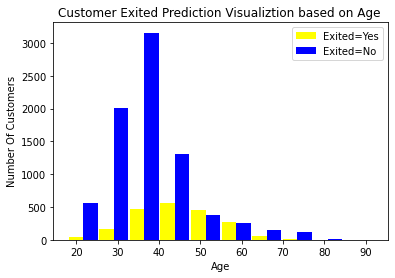

In [22]:
exited_no = df1[df1.Exited==0].Age
exited_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['yellow','blue'],label=['Exited=Yes','Exited=No'])
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


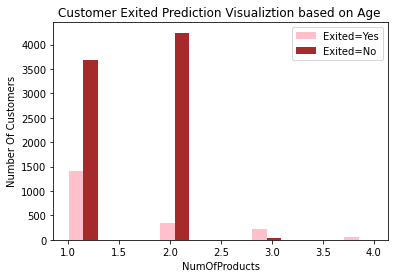

In [23]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['pink','brown'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [24]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [25]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
153,0.378,0,0.256757,0.2,0.508611,0.000000,1,0,0.493220,0,1,0,0
9352,0.634,0,0.297297,0.8,0.290737,0.333333,1,0,0.494647,0,1,0,0
6795,0.454,0,0.405405,0.6,0.716834,0.000000,1,0,0.967936,0,0,0,1
1857,0.388,1,0.148649,0.1,0.472545,0.000000,1,1,0.820707,0,1,0,0
7279,0.272,0,0.256757,0.1,0.404300,0.000000,0,0,0.256789,0,0,1,0
5285,0.072,1,0.472973,0.1,0.525931,0.000000,1,1,0.312545,1,0,0,1
4411,0.614,0,0.324324,0.5,0.165300,0.000000,1,0,0.564894,1,0,0,1
2706,0.692,0,0.054054,0.9,0.596963,0.000000,1,1,0.990201,0,1,0,0
5709,0.588,1,0.283784,0.9,0.000000,0.000000,1,0,0.018649,0,1,0,0
2383,0.694,0,0.324324,0.9,0.529056,0.333333,0,0,0.873364,0,1,0,0


In [26]:
df1.shape

(10000, 13)

In [27]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [28]:
X_train.shape


(8000, 12)

In [29]:
X_test.shape


(2000, 12)

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5678 - accuracy: 0.7035
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8041
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8094
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8112
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8158
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8185
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8223
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8265
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3935 - accura

In [31]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8485


[0.3564623296260834, 0.8485000133514404]

In [32]:
yp = model.predict(X_test)
yp[:5]

array([[0.05926898],
       [0.10094494],
       [0.05072638],
       [0.09656358],
       [0.06291485]], dtype=float32)

In [33]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.48      0.56       405

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

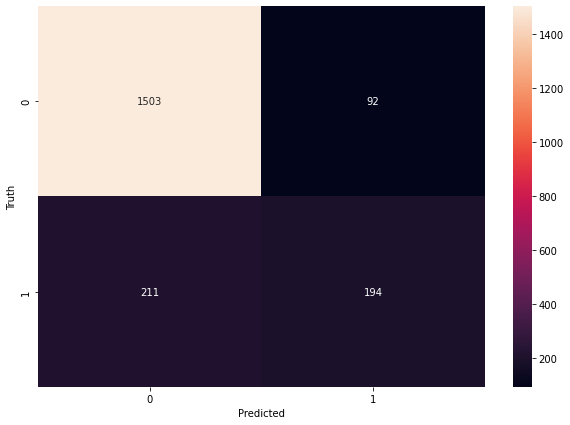

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [37]:
round((1504+191)/(1504+191+91+214),2)


0.85

Precision for customers who did not churn



In [38]:
round(1504/(1504+191),2)

0.89

Precision for customers who actually churned

In [39]:
round(191/(191+91),2)


0.68

In [40]:
round(1504/(1504+91),2)


0.94

In [41]:
round(191/(214+191),2)


0.47